# Statistical uncertanity in data

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.08/05


<ROOT.TStyle object ("tdrStyle") at 0x47fcc70>

In [2]:
#fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_WJets.root")

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")


treeIn = fin.Get("otree")

# Define the cuts
cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

### Get W+jet histogram in signal, lower side-band and in whole side-band (low as well as high) region

In [3]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hSignal = r.TH1D("hSignal","",38,600,2500)
hSignal.SetMarkerColor(1)
hSignal.SetLineColor(1)
hSignal.SetLineWidth(3)
hSignal.SetMarkerSize(1)
leg.AddEntry(hSignal,"signal region (MC)")

hSignal_4bin = r.TH1D("hSignal_4bin","",4,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(1)
leg.AddEntry(hSignal_4bin,"signal region (MC)")


hSideBand = r.TH1D("hSideBand","",38,600,2500)
hSideBand.SetMarkerColor(2)
hSideBand.SetLineColor(2)
hSideBand.SetLineWidth(3)
hSideBand.SetMarkerSize(1)
leg.AddEntry(hSideBand,"SideBand Region (MC)")


treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand",cutString_SideBand)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_4bin",cutString_Signal)

4162L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### Plot the Wjet histogram in signal region, side-band region and lower side-band region

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


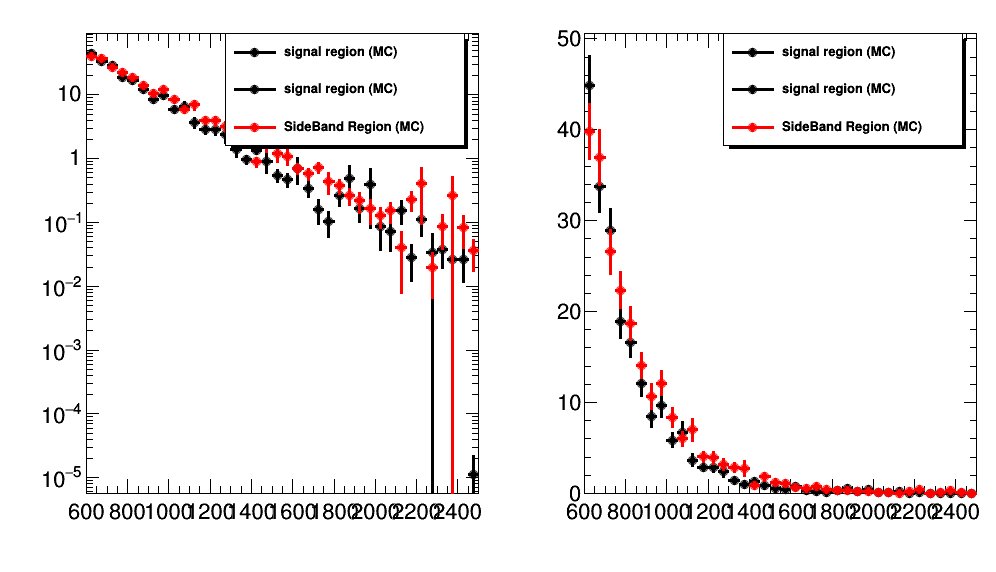

In [4]:
c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal.SetTitle("Log axis")
hSignal.Draw()
hSideBand.Draw("same")
leg.Draw()
c1.cd(2)
hSignal.SetTitle("Normal axis")
hSignal.Draw()
hSideBand.Draw("same")
leg.Draw()

c1.Draw()

# Part-I

## Calculate alpha 

> by dividing W+jets MC in signal and side-band region


> Also fit the alpha

Alpha does not exists

****************************************
Minimizer is Linear
Chi2                      =      37.0316
NDf                       =           36
p0                        =      1.30476   +/-   0.0531981   
p1                        = -0.000527049   +/-   2.14954e-05 
Integral =  1568.11718741
Integral =  926.885944026


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


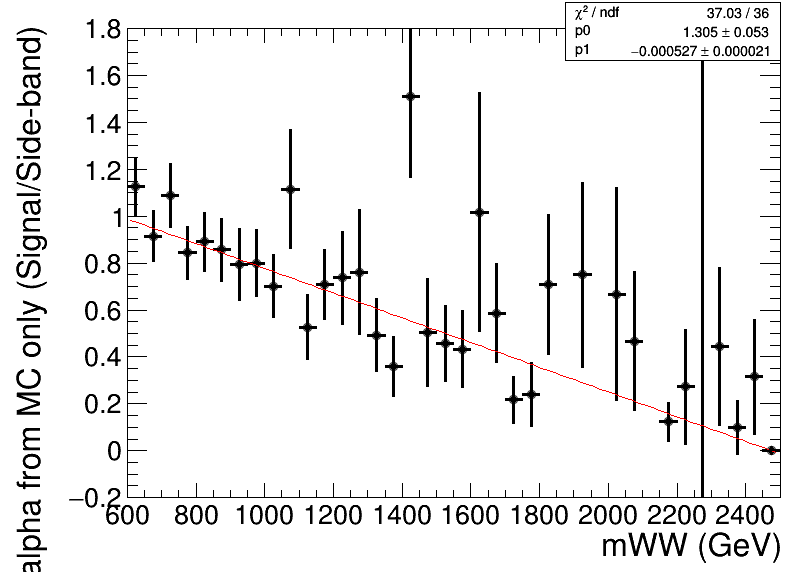

In [5]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",38,600,2500)
Alpha = hSignal.Clone()
Alpha.Divide(hSideBand)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.SetMaximum(1.8)
Alpha.SetMinimum(-0.2)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

Print alpha values in each bin: 


1 	600 650 => 625.0 0.975354648862
2 	650 700 => 675.0 0.949002219593
3 	700 750 => 725.0 0.922649790324
4 	750 800 => 775.0 0.896297361055
5 	800 850 => 825.0 0.869944931786
6 	850 900 => 875.0 0.843592502516
7 	900 950 => 925.0 0.817240073247
8 	950 1000 => 975.0 0.790887643978
9 	1000 1050 => 1025.0 0.764535214709
10 	1050 1100 => 1075.0 0.73818278544
11 	1100 1150 => 1125.0 0.71183035617
12 	1150 1200 => 1175.0 0.685477926901
13 	1200 1250 => 1225.0 0.659125497632
14 	1250 1300 => 1275.0 0.632773068363
15 	1300 1350 => 1325.0 0.606420639094
16 	1350 1400 => 1375.0 0.580068209824
17 	1400 1450 => 1425.0 0.553715780555
18 	1450 1500 => 1475.0 0.527363351286
19 	1500 1550 => 1525.0 0.501010922017
20 	1550 1600 => 1575.0 0.474658492748
21 	1600 1650 => 1625.0 0.448306063478
22 	1650 1700 => 1675.0 0.421953634209
23 	1700 1750 => 1725.0 0.39560120494
24 	1750 1800 => 1775.0 0.369248775671
25 	1800 1850 => 1825.0 0.342896346402
26 	1850 1900 => 1875.0 0

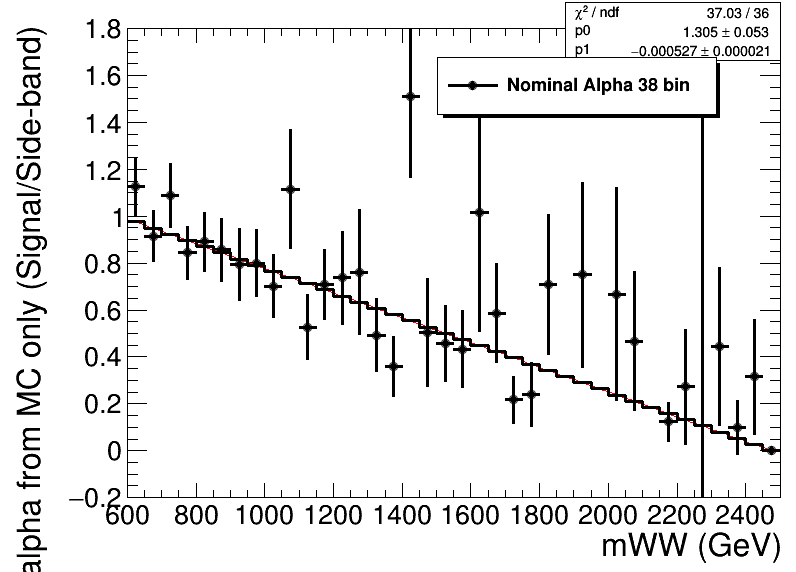

In [6]:
leg = r.TLegend(0.55,0.9,.9,0.8)

hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
print "Print alpha values in each bin: \n\n"
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(1)


leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha 38 bin")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

# Get corrected W+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

bin 1 content =  40.6307792664
bin 2 content =  38.0721282959
bin 3 content =  43.1628570557
bin 4 content =  39.8340076946


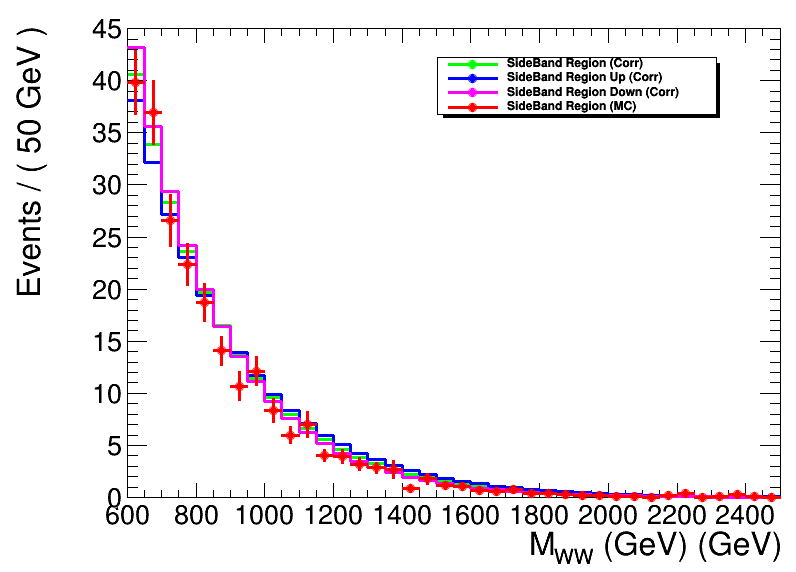

In [7]:
leg.Clear()
c1.Clear()
c1.SetLogy(0)
#Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
#Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_04_14_13h49_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB_UpDownVarWjet/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Wjet_file_Up = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB_UpDownVarWjet/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto_Up.root")
Wjet_file_Down = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB_UpDownVarWjet/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto_Down.root")


Wjet_hist = r.TH1F()
Wjet_hist_Up = r.TH1F()
Wjet_hist_Down = r.TH1F()

Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist.Scale(245.97)
Wjet_hist.SetMarkerColor(3)
Wjet_hist.SetLineColor(3)
Wjet_hist.SetLineWidth(3)
Wjet_hist.SetMarkerSize(1)
Wjet_hist.SetMaximum(45.0)
Wjet_hist.Draw("hist")

Wjet_hist_Up = Wjet_file_Up.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist_Up.Scale(245.97)
Wjet_hist_Up.SetMarkerColor(4)
Wjet_hist_Up.SetLineColor(4)
Wjet_hist_Up.SetLineWidth(3)
Wjet_hist_Up.SetMarkerSize(1)
Wjet_hist_Up.Draw("hist same")

Wjet_hist_Down = Wjet_file_Down.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist_Down.Scale(245.97)
Wjet_hist_Down.SetMarkerColor(6)
Wjet_hist_Down.SetLineColor(6)
Wjet_hist_Down.SetLineWidth(3)
Wjet_hist_Down.SetMarkerSize(1)
Wjet_hist_Down.Draw("hist same")

hSideBand.Draw("same")

leg.AddEntry(Wjet_hist,"SideBand Region (Corr)")
leg.AddEntry(Wjet_hist_Up,"SideBand Region Up (Corr)")
leg.AddEntry(Wjet_hist_Down,"SideBand Region Down (Corr)")
leg.AddEntry(hSideBand,"SideBand Region (MC)")

leg.Draw()
c1.Draw()

print "bin 1 content = ",Wjet_hist.GetBinContent(1)
print "bin 2 content = ",Wjet_hist_Up.GetBinContent(1)
print "bin 3 content = ",Wjet_hist_Down.GetBinContent(1)
print "bin 4 content = ",hSideBand.GetBinContent(1)

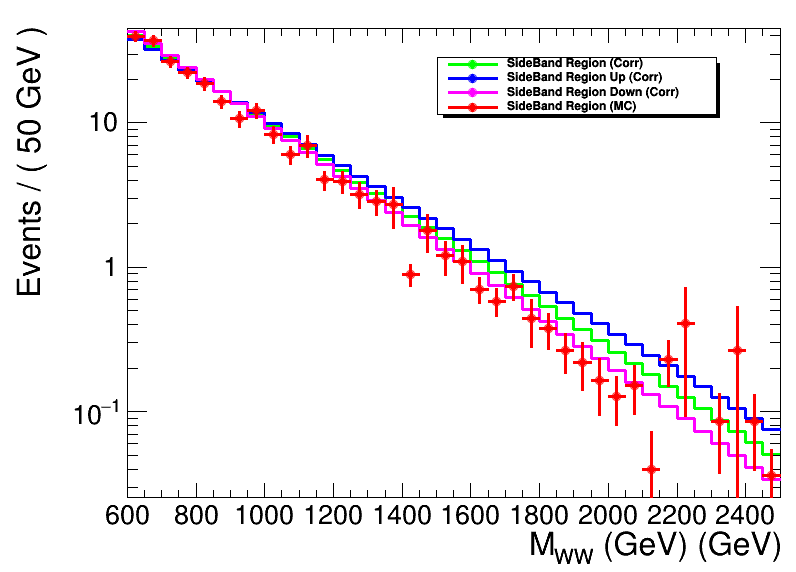

In [8]:
c1.SetLogy(1)
c1.Draw()

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

Wjet yield =  207.138268183
Bin 0 content =  39.6294212341
Bin 2 content =  32.1873550415
Bin 3 content =  26.1226863861
Bin 4 content =  21.1834125519
********************
MC bin contents: 

Bin 0 content =  183.380051662
Bin 2 content =  19.5358206203
Bin 3 content =  3.16529153612
Bin 4 content =  0.526633166523


Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Nominal_38bins.root has been created
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Up_38bins.root has been created
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Down_38bins.root has been created


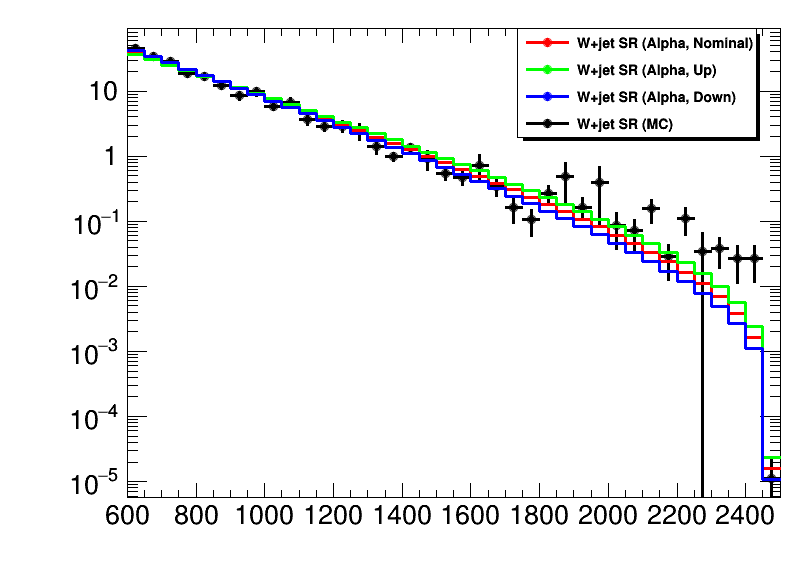

In [9]:
c1.Clear()
c1.SetLogy(0)
leg = r.TLegend(0.65,0.95,.95,0.76)


hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(2)
hModel_Sig.SetLineColor(2)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig,"W+jet SR (Alpha, Nominal)")

hModel_Sig.SaveAs("Wjet_Corr_Shape_Nominal_38bins.root")




hModel_Sig_up = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_up.Sumw2()
hModel_Sig_up.SetMarkerColor(3)
hModel_Sig_up.SetLineColor(3)
hModel_Sig_up.SetLineWidth(3)
hModel_Sig_up.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_up.SetBinContent(i,Wjet_hist_Up.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig_up,"W+jet SR (Alpha, Up)")

hModel_Sig_up.SaveAs("Wjet_Corr_Shape_Up_38bins.root")

hModel_Sig_Down = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_Down.Sumw2()
hModel_Sig_Down.SetMarkerColor(4)
hModel_Sig_Down.SetLineColor(4)
hModel_Sig_Down.SetLineWidth(3)
hModel_Sig_Down.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_Down.SetBinContent(i,Wjet_hist_Down.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig_Down,"W+jet SR (Alpha, Down)")



hModel_Sig_Down.SaveAs("Wjet_Corr_Shape_Down_38bins.root")




#hModel_Sig
hSignal.Draw()
hModel_Sig.Draw("same")
hModel_Sig_up.Draw("same")
hModel_Sig_Down.Draw("same")

leg.AddEntry(hSignal_4bin,"W+jet SR (MC)")


leg.Draw()

print "Wjet yield = ", hModel_Sig.Integral()

print "Bin 0 content = ",hModel_Sig.GetBinContent(1)
print "Bin 2 content = ",hModel_Sig.GetBinContent(2)
print "Bin 3 content = ",hModel_Sig.GetBinContent(3)
print "Bin 4 content = ",hModel_Sig.GetBinContent(4)
print "*"*20
print "MC bin contents: \n"
print "Bin 0 content = ",hSignal_4bin.GetBinContent(1)
print "Bin 2 content = ",hSignal_4bin.GetBinContent(2)
print "Bin 3 content = ",hSignal_4bin.GetBinContent(3)
print "Bin 4 content = ",hSignal_4bin.GetBinContent(4)
c1.SetLogy(1)
c1.Draw()

Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Nominal_4bins_DataUncert.root has been created
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Up_4bins_DataUncert.root has been created
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Down_4bins_DataUncert.root has been created


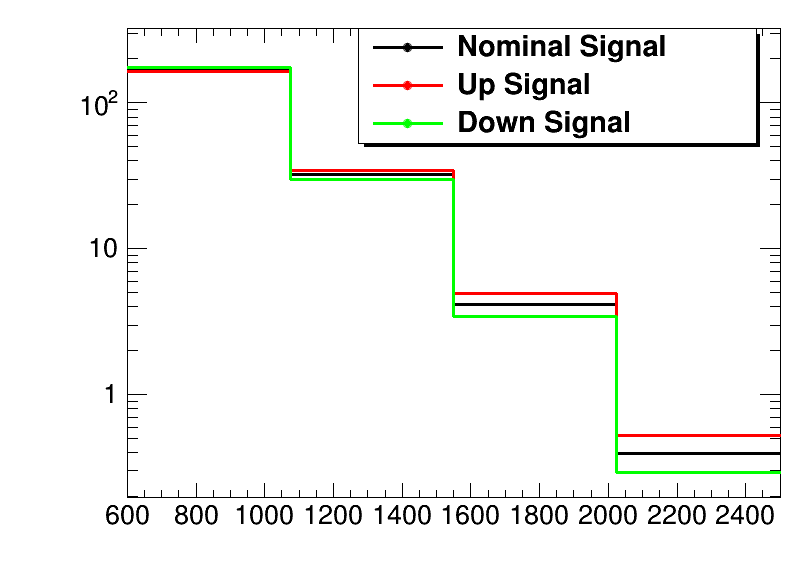

In [10]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hModel_Sig_new = r.TH1F("hModel_Sig_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig.GetBinContent(i)
    bin[count] += hModel_Sig.GetBinContent(i)

hModel_Sig_new.SetBinContent(1,bin[1])
hModel_Sig_new.SetBinContent(2,bin[2])
hModel_Sig_new.SetBinContent(3,bin[3])
hModel_Sig_new.SetBinContent(4,bin[4])

hModel_Sig_new.SetMarkerColor(1)
hModel_Sig_new.SetLineColor(1)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_new,"Nominal Signal")
hModel_Sig_new.SaveAs("Wjet_Corr_Shape_Nominal_4bins_DataUncert.root")

#########################################################
hModel_Sig_up_new = r.TH1F("hModel_Sig_up_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_up.GetBinContent(i)
    bin[count] += hModel_Sig_up.GetBinContent(i)

hModel_Sig_up_new.SetBinContent(1,bin[1])
hModel_Sig_up_new.SetBinContent(2,bin[2])
hModel_Sig_up_new.SetBinContent(3,bin[3])
hModel_Sig_up_new.SetBinContent(4,bin[4])

hModel_Sig_up_new.SetMarkerColor(2)
hModel_Sig_up_new.SetLineColor(2)
hModel_Sig_up_new.SetLineWidth(3)
hModel_Sig_up_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_up_new,"Up Signal")

    
hModel_Sig_up_new.SaveAs("Wjet_Corr_Shape_Up_4bins_DataUncert.root")

#########################################################
hModel_Sig_Down_new = r.TH1F("hModel_Sig_Down_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_Down.GetBinContent(i)
    bin[count] += hModel_Sig_Down.GetBinContent(i)

hModel_Sig_Down_new.SetBinContent(1,bin[1])
hModel_Sig_Down_new.SetBinContent(2,bin[2])
hModel_Sig_Down_new.SetBinContent(3,bin[3])
hModel_Sig_Down_new.SetBinContent(4,bin[4])

hModel_Sig_Down_new.SetMarkerColor(3)
hModel_Sig_Down_new.SetLineColor(3)
hModel_Sig_Down_new.SetLineWidth(3)
hModel_Sig_Down_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_Down_new,"Down Signal")

hModel_Sig_Down_new.SaveAs("Wjet_Corr_Shape_Down_4bins_DataUncert.root")

c1.Clear()
hModel_Sig_new.Draw()
hModel_Sig_up_new.Draw("same")
hModel_Sig_Down_new.Draw("same")
leg.Draw()
c1.Draw()

In [11]:
print "Program is done..."

Program is done...
